<a href="https://colab.research.google.com/github/bimal-bp/Time-series-forecasting_sarima.ipynb/blob/ML_MODELS/Time_series_forecasting_sarima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import Libries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

#TSA FROM STATSMODEL
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/avocado-updated-2020.csv')

In [3]:
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30021 entries, 0 to 30020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30021 non-null  object 
 1   average_price  30021 non-null  float64
 2   total_volume   30021 non-null  float64
 3   4046           30021 non-null  float64
 4   4225           30021 non-null  float64
 5   4770           30021 non-null  float64
 6   total_bags     30021 non-null  float64
 7   small_bags     30021 non-null  float64
 8   large_bags     30021 non-null  float64
 9   xlarge_bags    30021 non-null  float64
 10  type           30021 non-null  object 
 11  year           30021 non-null  int64  
 12  geography      30021 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.0+ MB


In [6]:
df['date']=pd.to_datetime(df['date'])

In [7]:
df['type'].value_counts()

conventional    15012
organic         15009
Name: type, dtype: int64

In [8]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [9]:
df['geography'].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

In [11]:
# Select US demand for organic avocados
my_data = df[(df['geography'] == 'Total U.S.') &
               (df['type'] == 'organic')][['date', 'total_volume']]
my_data

,date,total_volume
103,2015-01-04,612910.15
211,2015-01-11,669528.88
319,2015-01-18,713120.00
427,2015-01-25,556368.86
535,2015-02-01,740896.97
...,...,...
29584,2020-04-19,2182476.51
29692,2020-04-26,2135665.00
29800,2020-05-03,2157708.00
29908,2020-05-10,2388687.00


In [13]:
my_data['date_diff']=my_data['date'].diff()
my_data['date_diff'].value_counts()

7 days     271
6 days       3
1 days       1
36 days      1
8 days       1
Name: date_diff, dtype: int64

In [14]:
my_data.isnull().sum()

date            0
total_volume    0
date_diff       1
dtype: int64

In [15]:
# December 2018 is missing
# drop off 2019 and 2020 observation

my_data=my_data[(my_data['date'].dt.year != 2019)&
               (my_data['date'].dt.year != 2020)].set_index('date')
my_data.drop('date_diff',axis=1,inplace=True)

In [16]:
my_data

,total_volume
date,
2015-01-04,612910.15
2015-01-11,669528.88
2015-01-18,713120.00
2015-01-25,556368.86
2015-02-01,740896.97
...,...
2018-11-04,1436243.31
2018-11-11,1534804.73
2018-11-18,1652276.32


In [17]:
print(my_data[my_data.index.year == 2017].tail(1))
print(my_data[my_data.index.year==2018].head(1))

            total_volume
date                    
2017-12-31    1243940.09
            total_volume
date                    
2018-01-01    1243940.09


In [18]:
# This value is duplicated
my_data['weekday']=my_data.index.strftime('%a')
my_data['weekday'].value_counts()

Sun    205
Mon      1
Name: weekday, dtype: int64

In [19]:
# drop 1st date of 2018,weekday
# rename our target
my_data.drop(pd.Timestamp('2018-01-01'),inplace=True)
my_data.drop('weekday',axis=1,inplace=True)
my_data.rename(columns={'date':'ds','total_volume':'y'},inplace=True)
my_data

,y
date,
2015-01-04,612910.15
2015-01-11,669528.88
2015-01-18,713120.00
2015-01-25,556368.86
2015-02-01,740896.97
...,...
2018-11-04,1436243.31
2018-11-11,1534804.73
2018-11-18,1652276.32


In [22]:
my_data.index.year.value_counts()

2017    53
2015    52
2016    52
2018    48
Name: date, dtype: int64

In [23]:
# split data

train=my_data[:181]
test=my_data[181:]
train.shape,test.shape

((181, 1), (24, 1))

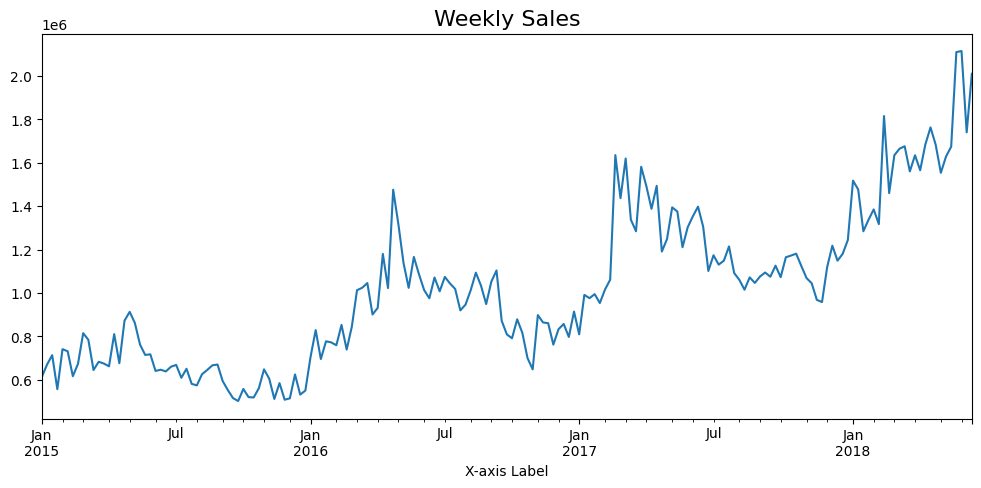

In [24]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Assuming 'train' is a DataFrame with the data you want to plot

# Specify the figure size and remove the legend
train.plot(figsize=(12, 5), legend=None)

# Set the title for the plot
plt.title('Weekly Sales', fontsize=16)

# Set the x-axis label (fix the typo 'xlable' to 'xlabel')
plt.xlabel('X-axis Label')

# Show the plot
plt.show()


Overview:

There appears to be an overall increasing trend.

There appears to be differences in the variance over time.

There may be some seasonality.

There may be some outliers.

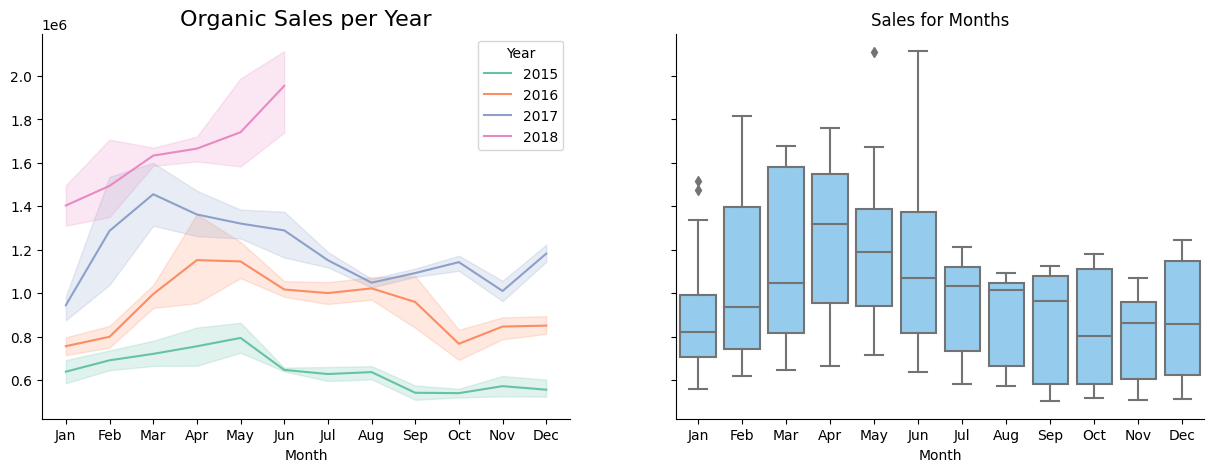

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'train' with a date index
# and a column 'y' representing sales data

train['Month'] = train.index.strftime('%b')
train['Year'] = train.index.year

fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.lineplot(data=train,
             hue='Year',
             x='Month',
             y='y',
             palette='Set2',
             ax=ax[0])
ax[0].set_title('Organic Sales per Year', fontsize=16)
ax[0].set_ylabel(None)

sns.boxplot(data=train,
            x='Month',
            y='y',
            color='lightskyblue',
            ax=ax[1])
ax[1].set_title('Sales for Months')
ax[1].set_ylabel(None)

sns.despine()
plt.show()

# Remove the 'Year' and 'Month' columns if you don't need them
train.drop(['Year', 'Month'], axis=1, inplace=True)


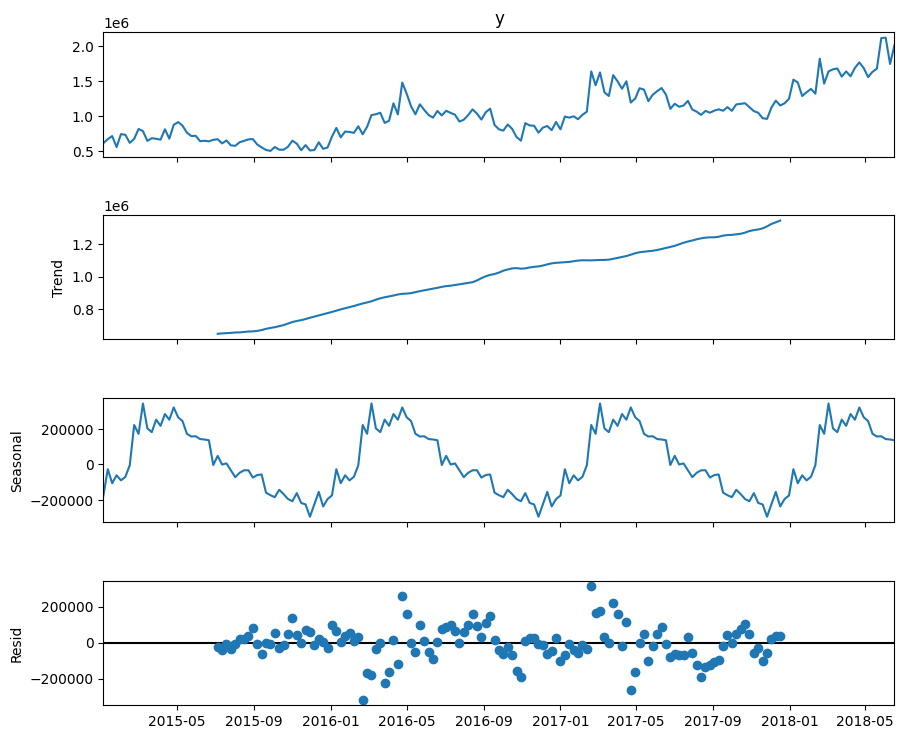

In [ ]:
# another way of decome series charactericsts
decomposition=seasonal_decompose(train['y'])
fig=decomposition.plot()
fig.set_size_inches(10,8)

# FORECASTING

In [ ]:
import itertools
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

trend = ['additive', 'multiplicative']
seasonality = ['additive', 'multiplicative']
periods = range(52, 56)
lowest_rmse = None
lowest_rmse_model = None

for model in itertools.product(trend, seasonality, periods):
    fcast_model = ExponentialSmoothing(train['y'],
                                       trend=model[0],
                                       seasonal=model[1],
                                       seasonal_periods=model[2])
    y_fcast = fcast_model.fit().forecast(len(test)).rename('y_fcast')  # Added .fit() before forecast

    # RMSE
    rmse = np.sqrt(np.mean((test['y'] - y_fcast) ** 2))

    if lowest_rmse is None:  # Changed "lower_rmse" to "lowest_rmse"
        lowest_rmse = rmse

    if rmse <= lowest_rmse:  # Changed "current_rmse" to "rmse"
        lowest_rmse = rmse
        lowest_rmse_model = model
    print('{} trend, {} seasonality, {} week frequency - RSME: {}'.format(model[0], model[1], model[2], rmse))

print('--------------------------------------------------------------------------------------')
print('Model that has the lowest RSME:')
print('{} trend, {} seasonality, {} week frequency - RSME: {}'.format(lowest_rmse_model[0], lowest_rmse_model[1],
                                                                  lowest_rmse_model[2], lowest_rmse))


additive trend, additive seasonality, 52 week frequency - RSME: 270354.4857908033
additive trend, additive seasonality, 53 week frequency - RSME: 238544.24671073037
additive trend, additive seasonality, 54 week frequency - RSME: 251012.11546243654
additive trend, additive seasonality, 55 week frequency - RSME: 242894.23070224232
additive trend, multiplicative seasonality, 52 week frequency - RSME: 10528307.77046958
additive trend, multiplicative seasonality, 53 week frequency - RSME: 194991.8546276701
additive trend, multiplicative seasonality, 54 week frequency - RSME: 194548.3931043994
additive trend, multiplicative seasonality, 55 week frequency - RSME: 176022.55201834676
multiplicative trend, additive seasonality, 52 week frequency - RSME: 306991.43146286666
multiplicative trend, additive seasonality, 53 week frequency - RSME: 284985.20971959113
multiplicative trend, additive seasonality, 54 week frequency - RSME: 312065.8142879328
multiplicative trend, additive seasonality, 55 wee

In [25]:
def error_metrics(y_fcast, y_test):
    """
    Return mean absolute percentage error (MAPE)
           mean percentage error (MPE)
           mean absolute error (MAE)
           root mean square error (RMSE)

    """
    print(f'MAPE: {np.mean(np.abs((y_test - y_fcast)/y_test))*100}')
    print(f'MPE:  {np.mean((y_test - y_fcast)/y_test)*100}')
    print(f'MAE:  {np.mean(np.abs(y_test - y_fcast))*100}')
    print(f'RMSE: {np.sqrt(np.mean((y_test - y_fcast)**2))}')


def exp_smoothing(y_train,
                  y_test,
                  trend=None,
                  seasonal=None,
                  period=None,
                  freq=None,
                  plot=False,
                  figsize=None):
    """
    Forecast using Holt-Winters exponential smoothing.
    Return a graph and error metrics.
    """
    # Modeling
    fcast_model = ExponentialSmoothing(y_train,
                                       trend=trend,
                                       seasonal=seasonal,
                                       seasonal_periods=period).fit()
    y_est = pd.DataFrame(fcast_model.fittedvalues).rename(columns={0:'y_fitted'}) # In-sample fit
    y_fcast = fcast_model.forecast(len(y_test)).rename('y_fcast') # Out-of-sample fit

    # Plot Series
    if plot:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=figsize)
        ax.set_title('Observed, Fitted, and Forecasted Series\nTriple Exponential Smoothing',
                     fontsize=16)
        ax.set_ylabel('Organic Avocado Weekly Sales')
        ax.plot(y_train,
                label='In-sample data',
                linestyle='-')
        ax.plot(y_test,
                label='Held-out data',
                linestyle='-')
        ax.plot(y_est,
                label='Fitted values',
                linestyle='--',
                color='g')
        ax.plot(y_fcast,
                label='Forecasts',
                linestyle='--',
                color='k')
        ax.legend(loc='best')
        plt.xticks(rotation = 45)
        plt.show(block = False)
        plt.close()

    # Print error metrics
    print('-----------------------------')
    if seasonal != None:
        print('{} trend, {} seasonality, {} {} frequency'.format(trend, seasonal, period, freq))
    error_metrics(y_fcast=y_fcast, y_test=y_test)
    print(f'AIC:  {fcast_model.aic}')
    print(f'BIC:  {fcast_model.bic}')


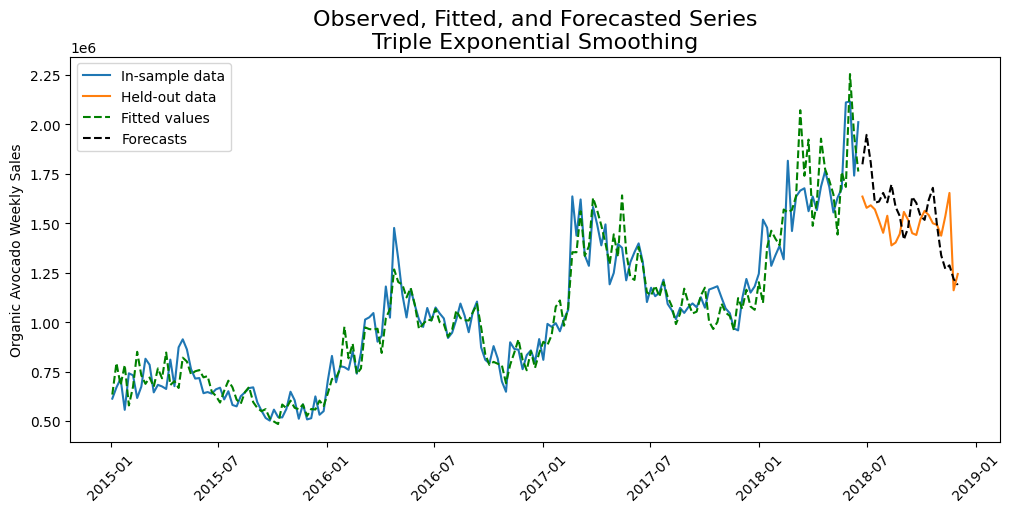

-----------------------------
additive trend, multiplicative seasonality, 55 week frequency
MAPE: 9.496547324879117
MPE:  -4.0140437033703815
MAE:  14256617.502366535
RMSE: 176022.55201834676
AIC:  4328.015635633048
BIC:  4516.726960477732


In [26]:

exp_smoothing(train['y'],
              test['y'],
              trend='additive',
              seasonal='multiplicative',
              period=55,
              freq='week',
              plot=True,
              figsize=(12,5))

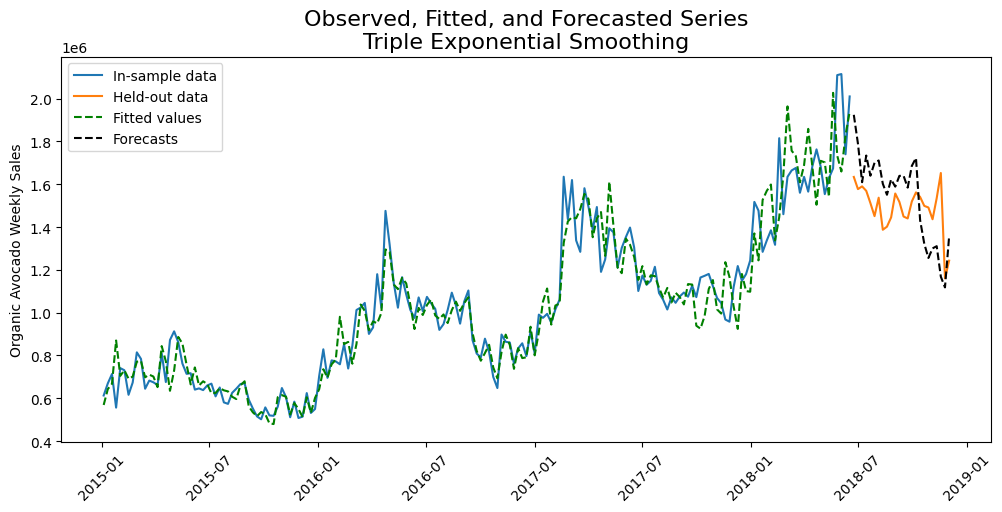

-----------------------------
additive trend, multiplicative seasonality, 54 week frequency
MAPE: 11.399557651575032
MPE:  -3.757022680347567
MAE:  17148732.255927414
RMSE: 194548.3931043994
AIC:  4340.505513922038
BIC:  4526.018341735456


In [ ]:

exp_smoothing(train['y'],
              test['y'],
              trend='additive',
              seasonal='multiplicative',
              period=54,
              freq='week',
              plot=True,
              figsize=(12,5))


**SARIMA**

- Stationrization



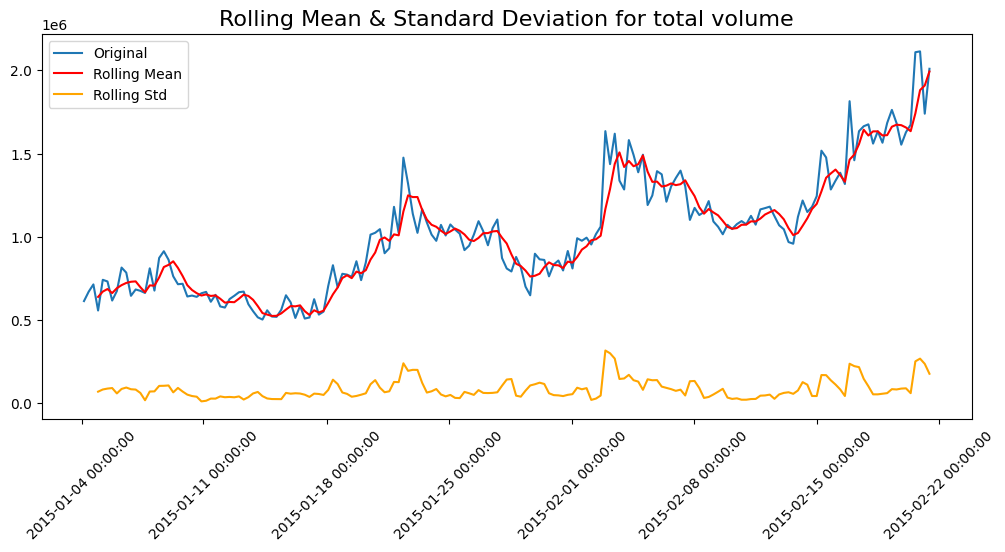

Result of Dickey-Fuller test:
Test Statistic                  -0.056566
p-value                          0.953597
Number of Lags Used              7.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64


In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def test_stationarity(y, title, window, figsize=(12, 5)):

    # Determine rolling statistics
    rolmean = y.rolling(window=window, center=False).mean()
    rolstd = y.rolling(window=window, center=False).std()

    # Plot rolling statistics
    fig, ax = plt.subplots(figsize=figsize)
    orig = ax.plot(y, label='Original')
    mean = ax.plot(rolmean, label='Rolling Mean', color='r')
    std = ax.plot(rolstd, label='Rolling Std', color='orange')
    ax.set_title('Rolling Mean & Standard Deviation for ' + title, fontsize=16)
    ax.set_xticklabels(y.index, rotation=45)  # Rotate x-axis labels
    ax.legend(loc='best')
    plt.show()

    # Perform Dickey-Fuller test:
    # Null hypothesis: Time series is not stationary
    # Alternative hypothesis: Time series is stationary
    print('Result of Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                        index=['Test Statistic',
                               'p-value',
                               'Number of Lags Used',
                               'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

test_stationarity(train['y'],
                  'total volume',
                  window=4)


- Its not a stationary series

In [31]:
def plot_general(y,
                 title='title',
                 lags=None,
                 figsize=(12,8)):
  fig=plt.figure(figsize=figsize)
  layout=(2,2)
  ts_ax=plt.subplot2grid(layout,(0,0))
  hist_ax=plt.subplot2grid(layout,(0,1))
  acf_ax=plt.subplot2grid(layout,(1,0))
  pacf_ax=plt.subplot2grid(layout,(1,1))

  y.plot(ax=ts_ax)
  ts_ax.set_xlabel(None)
  ts_ax.set_title(title)

  y.plot(ax=hist_ax,kind='hist',bins=25)
  hist_ax.set_title('Histogram')

  smt.graphics.plot_acf(y,lags=lags,ax=acf_ax)
  smt.graphics.plot_pacf(y,lags=lags,ax=pacf_ax)
  sns.despine()
  plt.tight_layout()

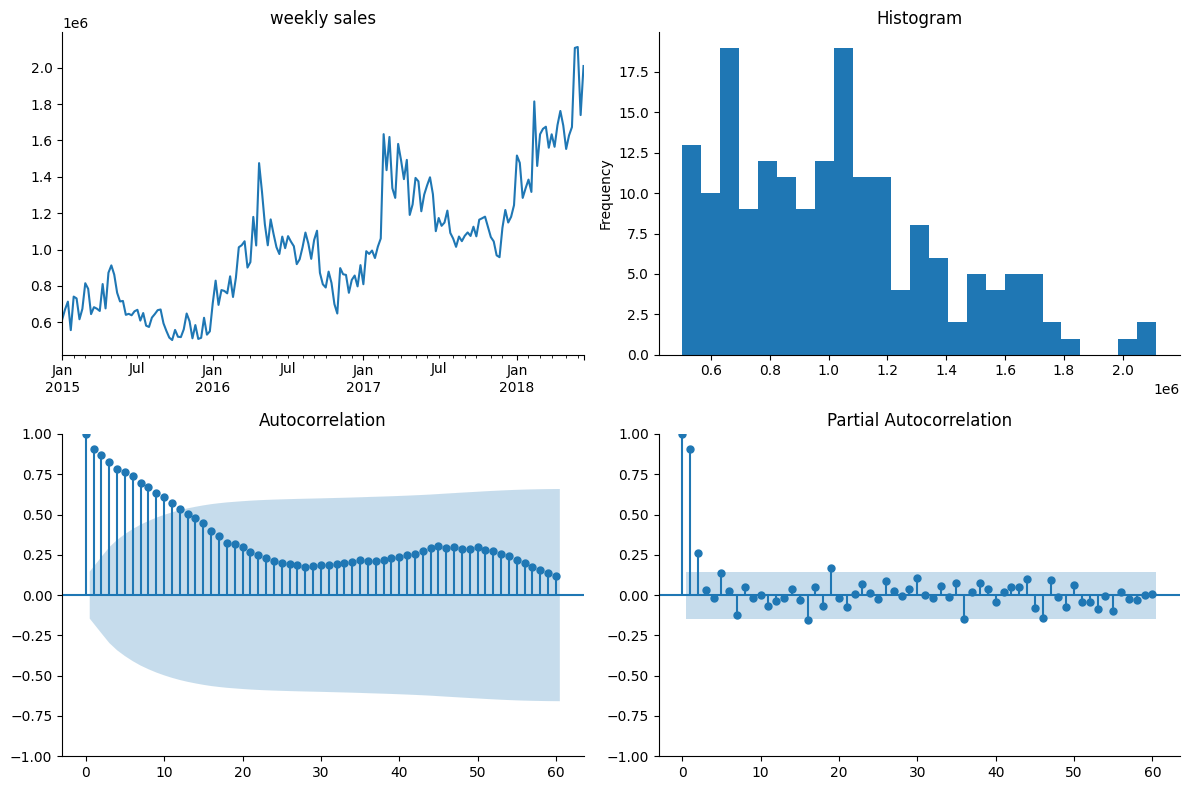

In [32]:
plot_general(train['y'],
             title='weekly sales',
             lags=60,
             figsize=(12,8))

- The ACF does not help much with identifying the seasonality.

In [33]:
# aplly log transformation

def plot_diff(y,
              title='title',
              diff=1,
              log=True,
              test=True,
              window=None,
              lags=None):
  if log:
    y=np.log(y)
    y_diff=y.diff(diff)
    y_diff.dropna(inplace=True)
  else:
    y_diff=y.diff(diff)
    y_diff.dropna(inplace=True)
  plot_general(y_diff,title,lags)
  if test:
    test_stationarity(y_diff,title,window)
  else:
    pass

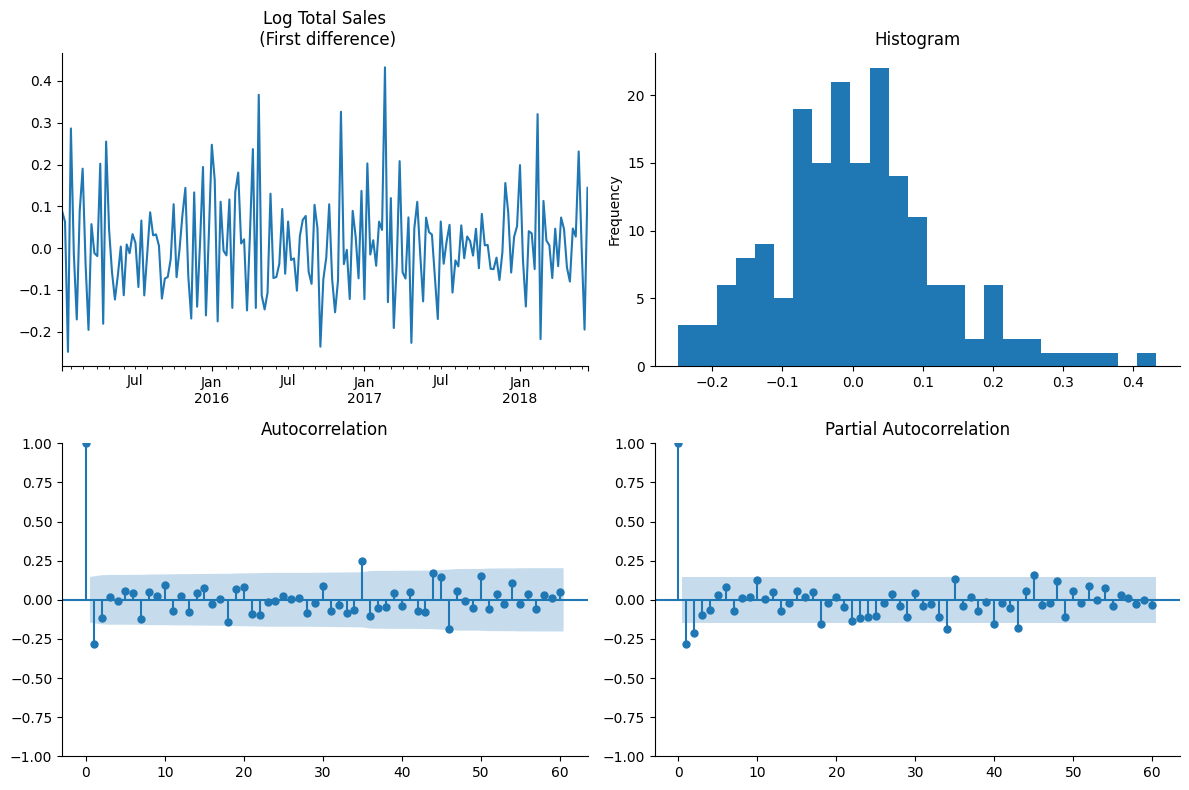

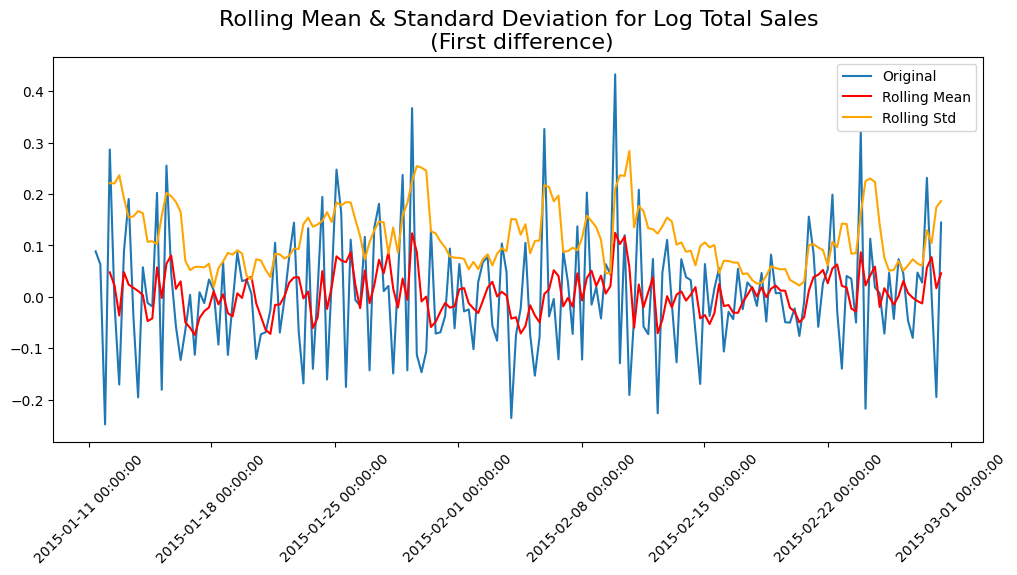

Result of Dickey-Fuller test:
Test Statistic                -1.318514e+01
p-value                        1.174325e-24
Number of Lags Used            1.000000e+00
Number of Observations Used    1.780000e+02
Critical Value (1%)           -3.467632e+00
Critical Value (5%)           -2.877918e+00
Critical Value (10%)          -2.575501e+00
dtype: float64


In [34]:
plot_diff(train['y'],
          window=4,
          lags=60,
          title='Log Total Sales\n (First difference)')

- The series is stationary

- The autocorelation is posetive

- The Acf has spikes while the pacf cuts off right after the lag 1.

- This suggests(P,D,Q)=(1,1,0)

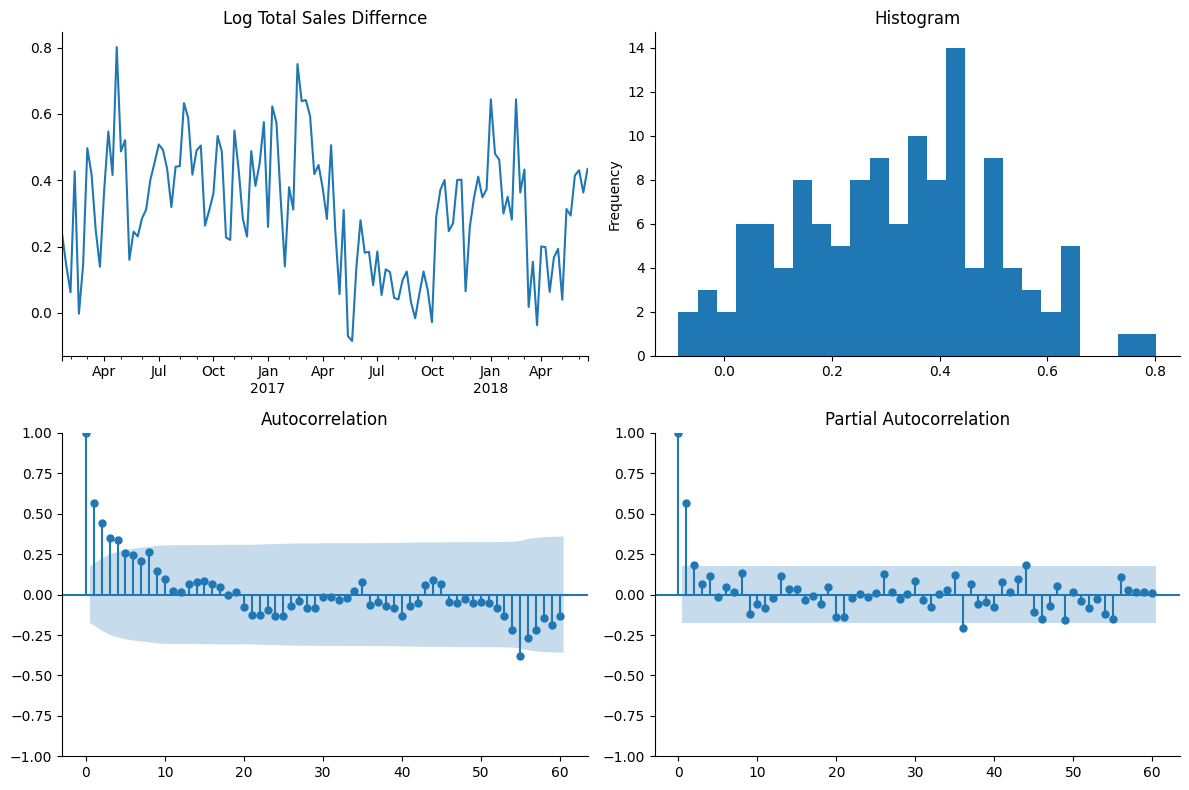

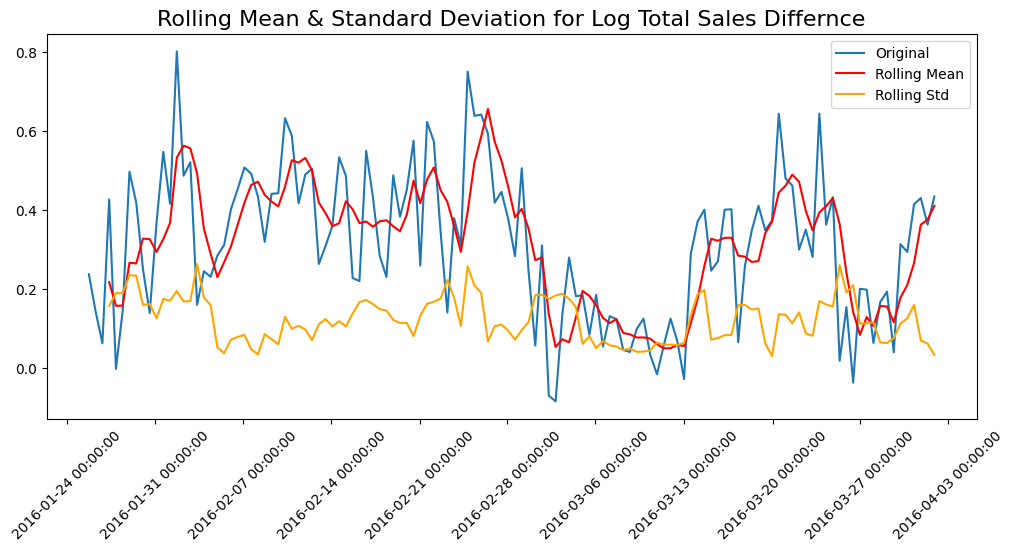

Result of Dickey-Fuller test:
Test Statistic                  -4.270180
p-value                          0.000500
Number of Lags Used              1.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


In [36]:
plot_diff(train['y'],
          window=4,
          lags=60,
          diff=55,
          title='Log Total Sales Differnce')

In [37]:
# Log transormation
log_train=np.log(train['y'])
log_test=np.log(test['y'])

MODEL SELECTION

In [40]:
import itertools
import statsmodels.api as sm

mdl_index = []
mdl_aic = []
mdl_bic = []

p = range(0, 2)
d = range(0, 2)
q = range(0, 2)
P = range(0, 2)
D = range(1, 2)
Q = range(0, 2)
S = range(53, 55)

lowest_aic = float("inf")  # Initialize with a high value
lowest_bic = float("inf")  # Initialize with a high value
best_model_aic = None
best_model_bic = None

# Grid search the hyperparameters of p, d, q and P, D, Q, S
for param in list(itertools.product(p, d, q)):
    for param_seasonal in list(itertools.product(P, D, Q, S)):
        mdl = sm.tsa.statespace.SARIMAX(log_train,
                                        order=param,
                                        seasonal_order=param_seasonal)
        results = mdl.fit()

        current_aic = results.aic
        current_bic = results.bic

        # Check if the current model has a lower AIC
        if current_aic < lowest_aic:
            lowest_aic = current_aic
            best_model_aic = mdl

        # Check if the current model has a lower BIC
        if current_bic < lowest_bic:
            lowest_bic = current_bic
            best_model_bic = mdl

        mdl_index.append('SARIMA{}x{}'.format(param, param_seasonal))
        mdl_aic.append(current_aic)
        mdl_bic.append(current_bic)

# Now you can access the best models with the lowest AIC and BIC using best_model_aic and best_model_bic.


In [41]:
print(pd.DataFrame(index=mdl_index, data=mdl_aic).rename(columns={0:'AIC'}).sort_values(by='AIC').head(5))
print('-----------------------------------------')
print(pd.DataFrame(index=mdl_index, data=mdl_bic).rename(columns={0:'BIC'}).sort_values(by='BIC').head(5))


                                      AIC
SARIMA(1, 1, 1)x(0, 1, 1, 54) -146.285639
SARIMA(1, 1, 1)x(1, 1, 0, 54) -145.193117
SARIMA(1, 1, 1)x(1, 1, 1, 54) -144.301478
SARIMA(0, 1, 1)x(0, 1, 1, 54) -142.806052
SARIMA(0, 1, 1)x(1, 1, 0, 54) -141.026672
-----------------------------------------
                                      BIC
SARIMA(1, 1, 1)x(0, 1, 1, 54) -134.940511
SARIMA(0, 1, 1)x(0, 1, 1, 54) -134.297206
SARIMA(1, 1, 1)x(1, 1, 0, 54) -133.847989
SARIMA(0, 1, 1)x(1, 1, 0, 54) -132.517826
SARIMA(1, 1, 1)x(1, 1, 1, 54) -130.120068


- SARIMA(1, 1, 1)x(0, 1, 1, 54) appears to be the best model.

- SARIMA(0, 1, 1)x(0, 1, 1, 54) has the common form of a seasonal model and it has the second highest BIC.

modeling

In [45]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

class Sarima:
    def __init__(self, y_train, y_test, order, seasonal_order):
        self.y_train = y_train
        self.y_test = y_test
        self.order = order
        self.seasonal_order = seasonal_order

        # Modeling
        self._model = sm.tsa.statespace.SARIMAX(self.y_train, order=self.order, seasonal_order=seasonal_order)
        self._results = self._model.fit()

        # Construct in-sample fit
        self.y_est = self._results.get_prediction()
        self.y_est_mean = self.y_est.predicted_mean
        self.y_est_ci = self.y_est.conf_int(alpha=0.05)

        # Construct out-of-sample forecast
        self.y_fcast = self._results.get_forecast(steps=len(y_test)).summary_frame()
        self.y_fcast.set_index(y_test.index, inplace=True)

    def results(self):
        print(self._results.summary())

    def diagnostics(self):
        self._results.plot_diagnostics(figsize=(15, 8))
        plt.show()

    def plot(self):
        # Transform to original scale
        inv_y_fcast = np.exp(self.y_fcast)
        inv_y_est_mean = np.exp(self.y_est_mean)
        inv_y_est_ci = np.exp(self.y_est_ci)
        inv_y_train = np.exp(self.y_train)
        inv_y_test = np.exp(self.y_test)

        # Plot the series
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
        start_index = self.order[1] + self.seasonal_order[3]
        ax.set_title('Observed, Fitted, and Forecasted Series\nSARIMA{}x{}'.format(self.order, self.seasonal_order),
                     fontsize=16)
        ax.set_ylabel('Organic avocado weekly sales')
        ax.plot(inv_y_train, label='In-sample data', linestyle='-')
        ax.plot(inv_y_test, label='Held-out data', linestyle='-')
        ax.plot(inv_y_est_mean[start_index:], label='Fitted Values', linestyle='--', color='g')
        ax.plot(inv_y_fcast['mean'], label='Forecasts', linestyle='--', color='k')

        # Plot confidence intervals
        ax.fill_between(inv_y_est_mean[start_index:].index, inv_y_est_ci.iloc[start_index:, 0], inv_y_est_ci.iloc[start_index:, 1], color='g', alpha=0.05)
        ax.fill_between(inv_y_fcast.index, inv_y_fcast['mean_ci_lower'], inv_y_fcast['mean_ci_upper'], color='k', alpha=0.05)
        ax.legend(loc='upper left')
        plt.xticks(rotation=45)
        plt.show()

        # You need to define and call the error_metrics function here
        self.error_metrics(inv_y_fcast['mean'], inv_y_test)

    # Define the error_metrics function here
    def error_metrics(self, y_fcast, y_test):
        # Calculate and print error metrics (e.g., MAE, RMSE, MAPE)
        pass  # Replace this with the implementation of error_metrics


In [46]:

Sarima(y_train=log_train,
       y_test=log_test,
       order=(1, 1, 1),
       seasonal_order=(0, 1, 1, 54)).results()

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  181
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 54)   Log Likelihood                  77.143
Date:                            Sun, 29 Oct 2023   AIC                           -146.286
Time:                                    10:41:57   BIC                           -134.941
Sample:                                01-04-2015   HQIC                          -141.676
                                     - 06-17-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3506      0.142      2.461      0.014       0.071       0.630
ma.L1         -0.8384      0.075   

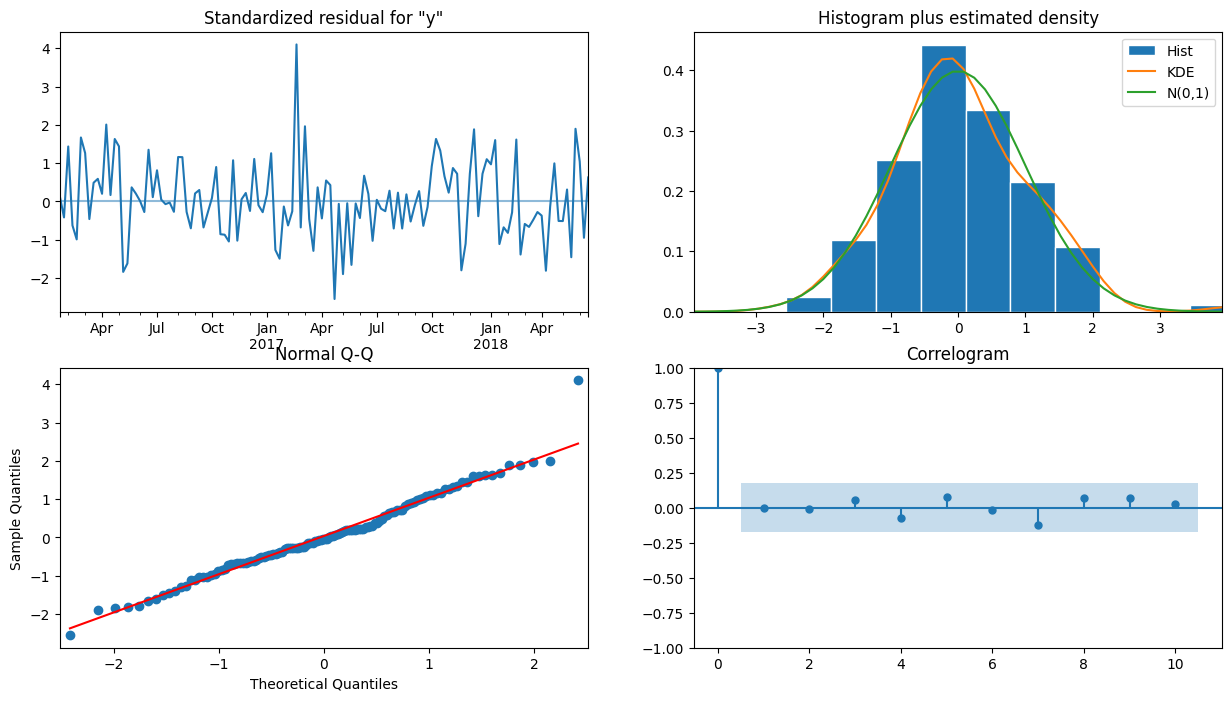

In [47]:
Sarima(y_train=log_train,
       y_test=log_test,
       order=(1, 1, 1),
       seasonal_order=(0, 1, 1, 54)).diagnostics()

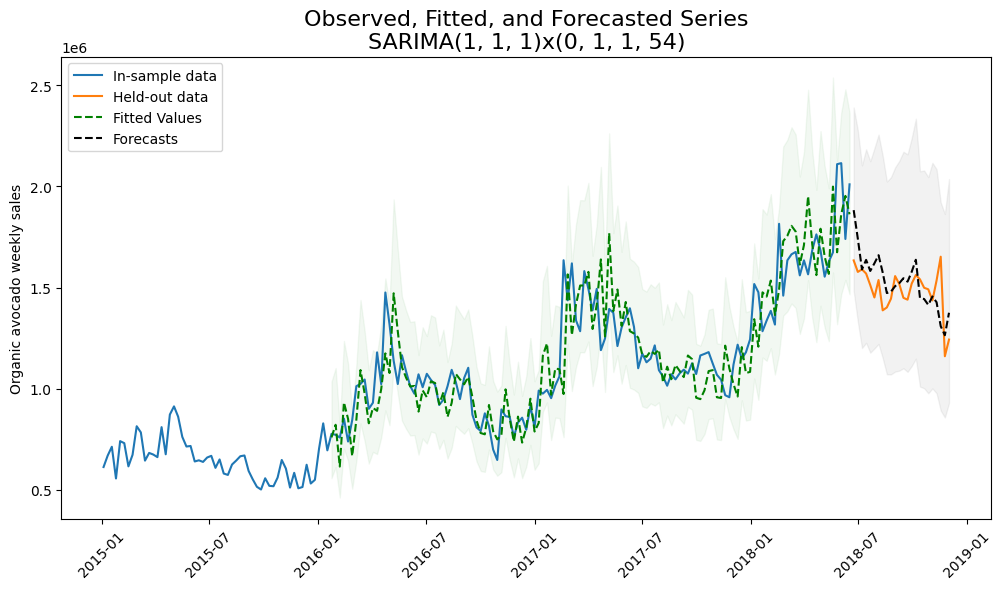

In [48]:

Sarima(y_train=log_train,
       y_test=log_test,
       order=(1, 1, 1),
       seasonal_order=(0, 1, 1, 54)).plot()

SARIMA(0, 1, 1)x(0, 1, 1, 54)

In [49]:
Sarima(y_train=log_train,
       y_test=log_test,
       order=(0, 1, 1),
       seasonal_order=(0, 1, 1, 54)).results()


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  181
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 54)   Log Likelihood                  74.403
Date:                            Sun, 29 Oct 2023   AIC                           -142.806
Time:                                    10:43:48   BIC                           -134.297
Sample:                                01-04-2015   HQIC                          -139.349
                                     - 06-17-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5848      0.079     -7.382      0.000      -0.740      -0.430
ma.S.L54      -0.6273      0.215   

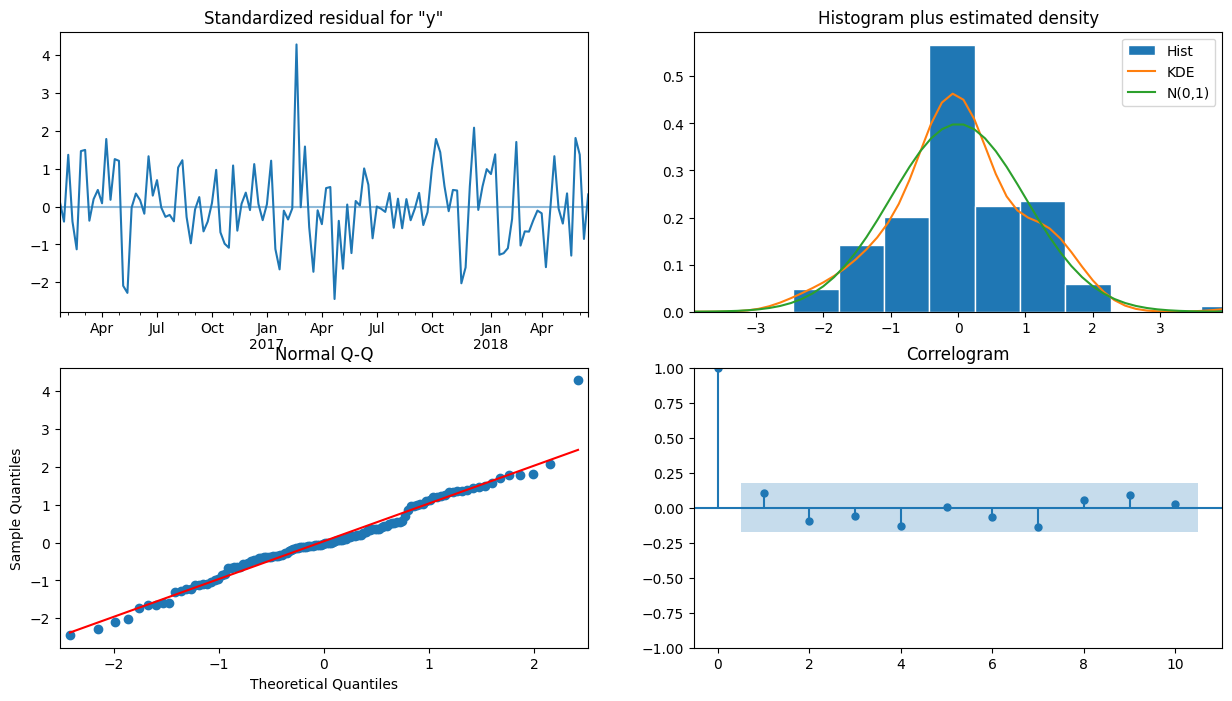

In [50]:

Sarima(y_train=log_train,
       y_test=log_test,
       order=(0, 1, 1),
       seasonal_order=(0, 1, 1, 54)).diagnostics()

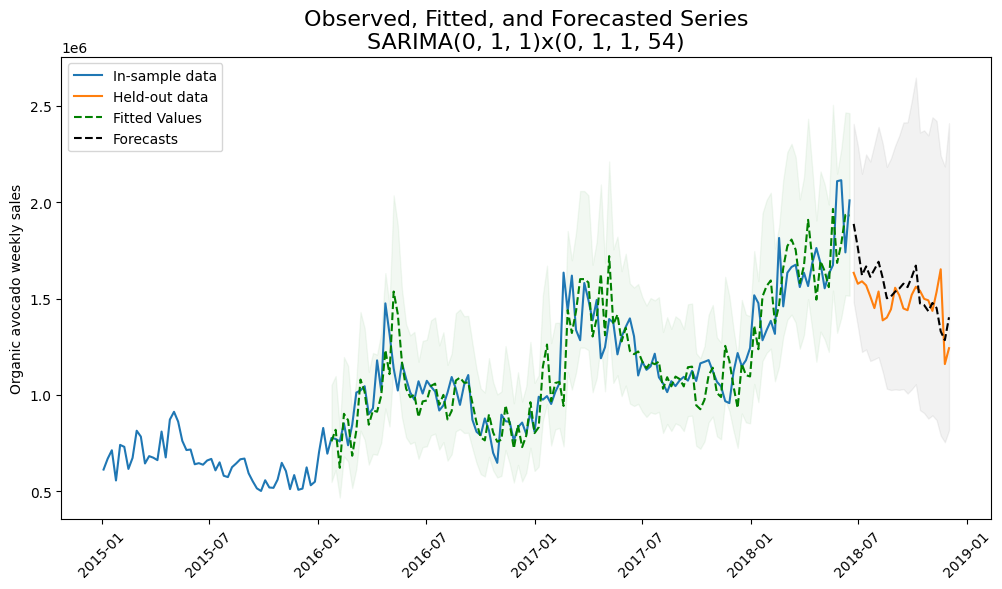

In [51]:

Sarima(y_train=log_train,
       y_test=log_test,
       order=(0, 1, 1),
       seasonal_order=(0, 1, 1, 54)).plot()

In [52]:
# we are getting a good result but due to not working of fbprohate whuch is best fot time series i am not doing it  right now